In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/updated_tamil_tweet_data.csv")

In [ ]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,6159,user_68,Coimbatore,A Tamil movie lover,03-02-2023,376,239,571,False,21-08-2024,padam vera level ah irundhathu!,#kollywood,Twitter for iPhone,83,23,True
1,4519,user_87,Coimbatore,A Tamil movie lover,21-12-2022,334,91,162,False,23-08-2024,story romba interesting ah irukku.,#tamillove,Twitter for iPhone,92,20,False
2,6917,user_18,Coimbatore,A Tamil movie lover,28-08-2023,109,59,506,True,03-08-2024,songs ellam semma feel kuduthuthu.,#kollywood,Twitter Web App,78,71,True
3,9212,user_13,Coimbatore,A Tamil movie lover,13-01-2022,311,65,276,True,19-08-2024,climax konjam expected ah irundhuchu.,#kollywood,Twitter Web App,19,100,False
4,5854,user_57,Erode,A Tamil movie lover,08-12-2023,376,231,393,False,09-10-2024,visuals romba nalla irundhathu.,#kollywood,Twitter Web App,56,60,False


In [ ]:
def basic_eda(df, row_limit=5, list_elements_limit=10):
    ### rows and columns
    print('Info : There are {} columns in the dataset'.format(df.shape[1]))
    print('Info : There are {} rows in the dataset'.format(df.shape[0]))

    print("==================================================")

    ## data types
    print("\nData type information of different columns")
    dtypes_df = pd.DataFrame(df.dtypes).reset_index().rename(columns={0:'dtype', 'index':'column_name'})
    cat_df = dtypes_df[dtypes_df['dtype']=='object']
    num_df = dtypes_df[dtypes_df['dtype']!='object']
    print('Info : There are {} categorical columns'.format(len(cat_df)))
    print('Info : There are {} numerical columns'.format(len(dtypes_df)-len(cat_df)))

    if list_elements_limit >= len(cat_df):
        print("Categorical columns : ", list(cat_df['column_name']))
    else:
        print("Categorical columns : ", list(cat_df['column_name'])[:list_elements_limit])

    if list_elements_limit >= len(num_df):
        print("Numerical columns : ", list(num_df['column_name']))
    else:
        print("Numerical columns : ", list(num_df['column_name'])[:list_elements_limit])

    #dtypes_df['dtype'].value_counts().plot.bar()
    display(dtypes_df.head(row_limit))

    print("==================================================")
    print("\nDescription of numerical variables")

    #### Describibg numerical columns
    desc_df_num = df[list(num_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_num.head(row_limit))

    print("==================================================")
    print("\nDescription of categorical variables")

    desc_df_cat = df[list(cat_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_cat.head(row_limit))

    return

In [ ]:
basic_eda(data)

Info : There are 16 columns in the dataset
Info : There are 110 rows in the dataset

Data type information of different columns
Info : There are 8 categorical columns
Info : There are 8 numerical columns
Categorical columns :  ['user_name', 'user_location', 'user_description', 'user_created', 'date', 'text', 'hashtags', 'source']
Numerical columns :  ['id', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'retweets', 'favorites', 'is_retweet']


,column_name,dtype
0,id,int64
1,user_name,object
2,user_location,object
3,user_description,object
4,user_created,object



Description of numerical variables


,column_name,count,mean,std,min,25%,50%,75%,max
0,id,110.0,50896.936364,28349.731649,1766.0,29695.75,51635.0,74063.25,99805.0
1,user_followers,110.0,541.590909,286.297667,78.0,287.75,537.0,798.75,992.0
2,user_friends,110.0,459.081818,283.316568,57.0,229.50,407.0,711.00,988.0
3,user_favourites,110.0,544.072727,279.510769,7.0,333.75,573.5,771.75,993.0
4,retweets,110.0,97.890909,56.428789,1.0,48.25,102.5,144.00,200.0



Description of categorical variables


,column_name,count,unique,top,freq
0,user_name,110,78,user_173,4
1,user_location,110,7,Coimbatore,19
2,user_description,110,5,Film buff,31
3,user_created,110,107,27-04-2018,2
4,date,110,95,26-10-2024,3


In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
transformer_sentiments = data.text.apply(sentiment_analysis)
labels = []
scores = []
for sentiment in transformer_sentiments:
    #print(f"label: {sentiment[0]['label']}, with score: {round(sentiment[0]['score'], 4)}")
    labels.append(sentiment[0]['label'])
    scores.append(round(sentiment[0]['score'], 4))
data['tf-sentiment'] = labels
data['tf-score'] = scores
data[['text', 'tf-sentiment', 'tf-score']].head(3)

,text,tf-sentiment,tf-score
0,padam vera level ah irundhathu!,NEGATIVE,0.9280
1,story romba interesting ah irukku.,POSITIVE,0.9934
2,songs ellam semma feel kuduthuthu.,POSITIVE,0.8703


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def find_sentiment(tweet):
    if sia.polarity_scores(tweet)["compound"] > 0:
        return "POSITIVE"
    elif sia.polarity_scores(tweet)["compound"] < 0:
        return "NEGATIVE"
    else:
        return "NEUTRAL"
vader_sentiments = data.text.apply(find_sentiment)
data['vader-sentiment'] = vader_sentiments
data[['text', 'vader-sentiment']].head(3)

,text,vader-sentiment
0,padam vera level ah irundhathu!,NEUTRAL
1,story romba interesting ah irukku.,POSITIVE
2,songs ellam semma feel kuduthuthu.,NEUTRAL


In [ ]:
df = data[['text', 'tf-score', 'tf-sentiment', 'vader-sentiment']]
df.head(3)

,text,tf-score,tf-sentiment,vader-sentiment
0,padam vera level ah irundhathu!,0.9280,NEGATIVE,NEUTRAL
1,story romba interesting ah irukku.,0.9934,POSITIVE,POSITIVE
2,songs ellam semma feel kuduthuthu.,0.8703,POSITIVE,NEUTRAL


Distribution of classes : Optimus Prime


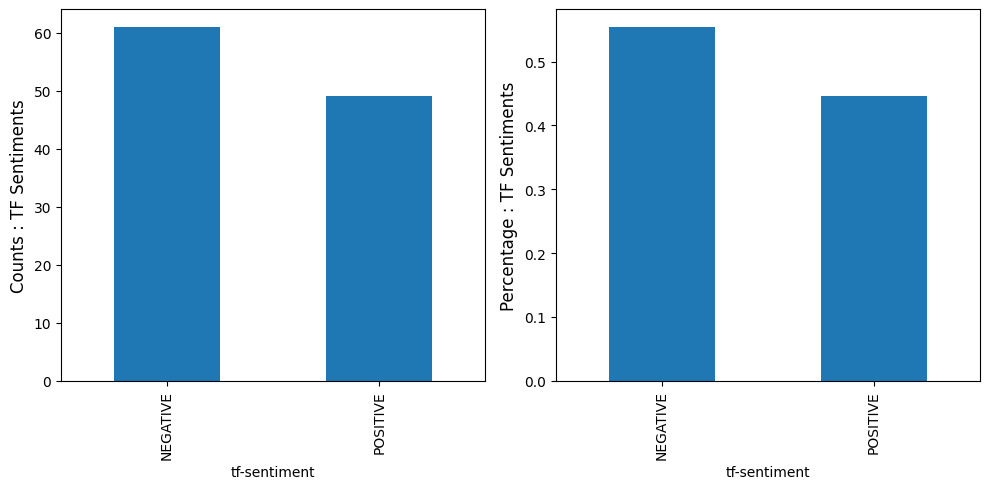

In [ ]:
print("Distribution of classes : Optimus Prime")
counts = df['tf-sentiment'].value_counts()
percent = counts/sum(counts)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

counts.plot(kind='bar', ax=ax1)
percent.plot(kind='bar', ax=ax2)
ax1.set_ylabel('Counts : TF Sentiments', size=12)
ax2.set_ylabel('Percentage : TF Sentiments', size=12)
plt.tight_layout()
plt.show()

Distribution of classes : Darth Vader


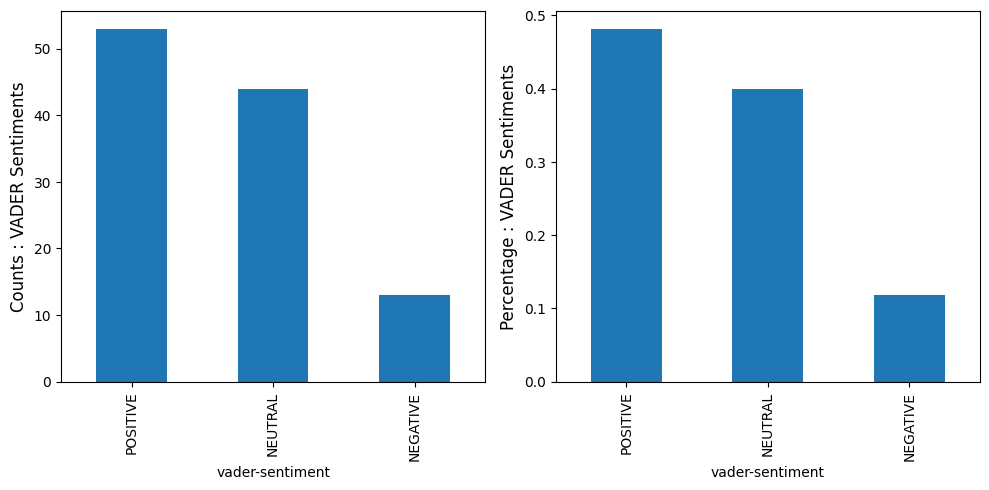

In [ ]:
print("Distribution of classes : Darth Vader")
counts = df['vader-sentiment'].value_counts()
percent = counts/sum(counts)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

counts.plot(kind='bar', ax=ax1)
percent.plot(kind='bar', ax=ax2)
ax1.set_ylabel('Counts : VADER Sentiments', size=12)
ax2.set_ylabel('Percentage : VADER Sentiments', size=12)
plt.tight_layout()
plt.show()

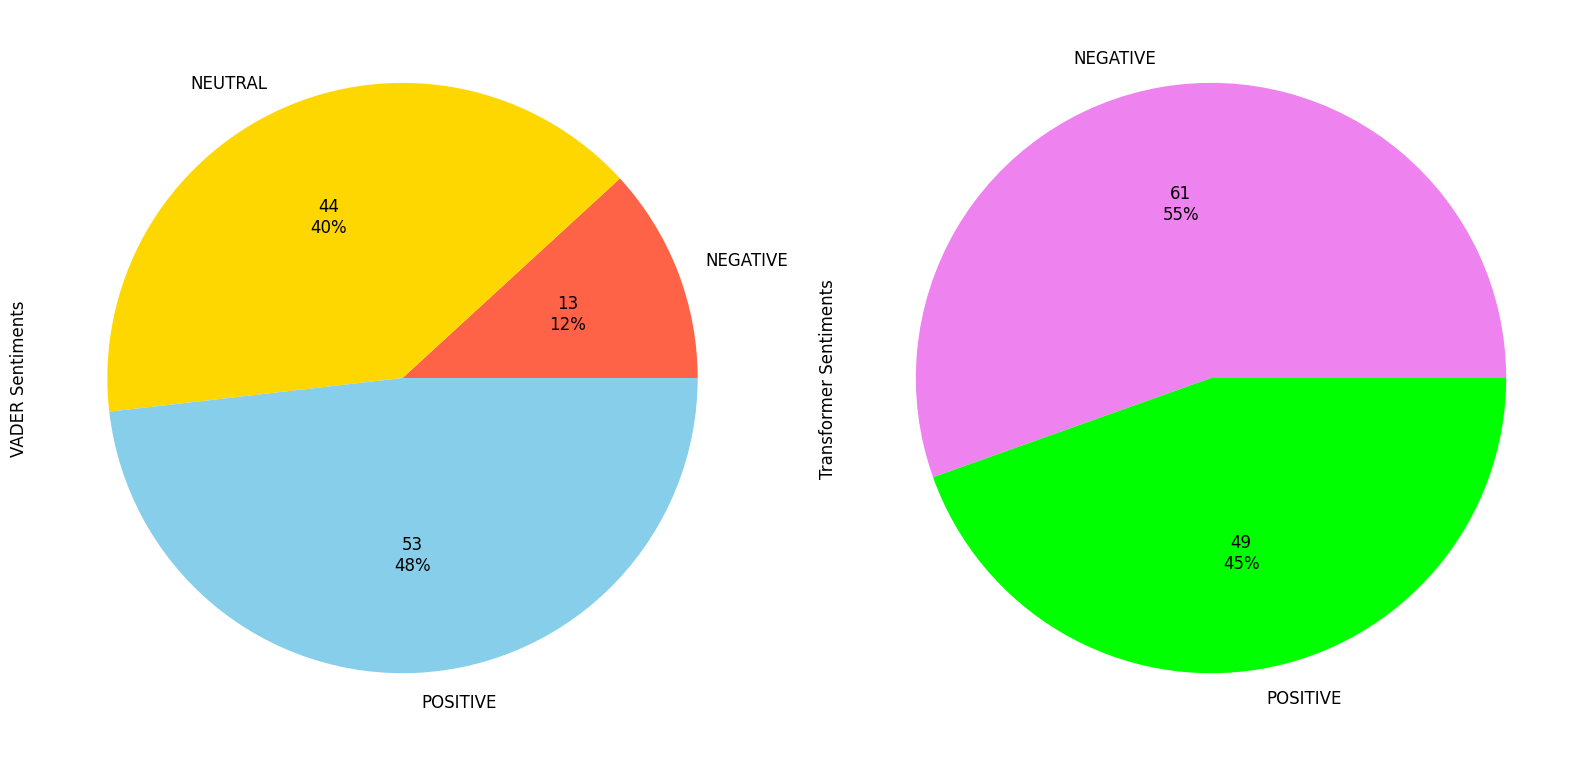

In [ ]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

df.groupby('vader-sentiment').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12},
                                  colors=['tomato', 'gold', 'skyblue'], ax=ax1)
df.groupby('tf-sentiment').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12},
                                 colors=['violet', 'lime'], ax=ax2)
ax1.set_ylabel('VADER Sentiments', size=12)
ax2.set_ylabel('Transformer Sentiments', size=12)
plt.tight_layout()
plt.show()

In [ ]:
def same_or_diff(x):
    if x[0]==x[1]:
        return "Same"
    else:
        return "Different"

In [ ]:
print("Same or Different including the Neutral records")
df['same_or_diff_w_neut'] = df[['tf-sentiment', 'vader-sentiment']].apply(same_or_diff, axis=1)
df.head(3)

Same or Different including the Neutral records


,text,tf-score,tf-sentiment,vader-sentiment,same_or_diff_w_neut
0,padam vera level ah irundhathu!,0.9280,NEGATIVE,NEUTRAL,Different
1,story romba interesting ah irukku.,0.9934,POSITIVE,POSITIVE,Same
2,songs ellam semma feel kuduthuthu.,0.8703,POSITIVE,NEUTRAL,Different


Same or Different including the Neutral records : Comparision


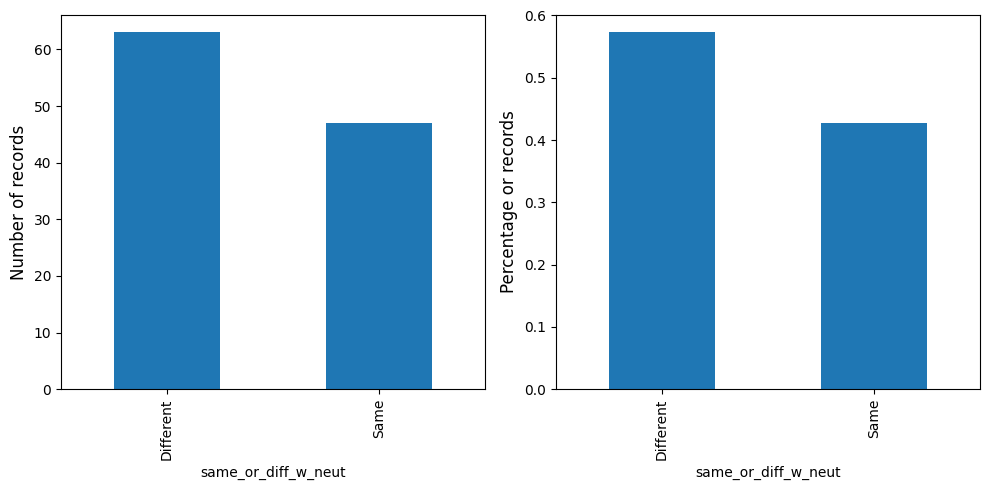

In [ ]:
print("Same or Different including the Neutral records : Comparision")
counts = df['same_or_diff_w_neut'].value_counts()
percent = counts/sum(counts)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

counts.plot(kind='bar', ax=ax1)
percent.plot(kind='bar', ax=ax2)
ax1.set_ylabel('Number of records', size=12)
ax2.set_ylabel('Percentage or records', size=12)
plt.tight_layout()
plt.show()

In [ ]:
print("Same or Different after removing the Neutral records")
dfwn = df[df['vader-sentiment'] != 'NEUTRAL']
# Just to ensure
print("==================================\n")
print(dfwn['vader-sentiment'].value_counts())
dfwn['same_or_diff_wo_neut'] = dfwn[['tf-sentiment', 'vader-sentiment']].apply(same_or_diff, axis=1)
dfwn.head(3)

Same or Different after removing the Neutral records

vader-sentiment
POSITIVE    53
NEGATIVE    13
Name: count, dtype: int64


,text,tf-score,tf-sentiment,vader-sentiment,same_or_diff_w_neut,same_or_diff_wo_neut
1,story romba interesting ah irukku.,0.9934,POSITIVE,POSITIVE,Same,Same
6,hero nadippu super ah irukku.,0.9502,NEGATIVE,POSITIVE,Different,Different
8,padathoda BGM romba powerful ah irundhathu.,0.9808,POSITIVE,POSITIVE,Same,Same


Same or Different after removing the Neutral records : Comparision


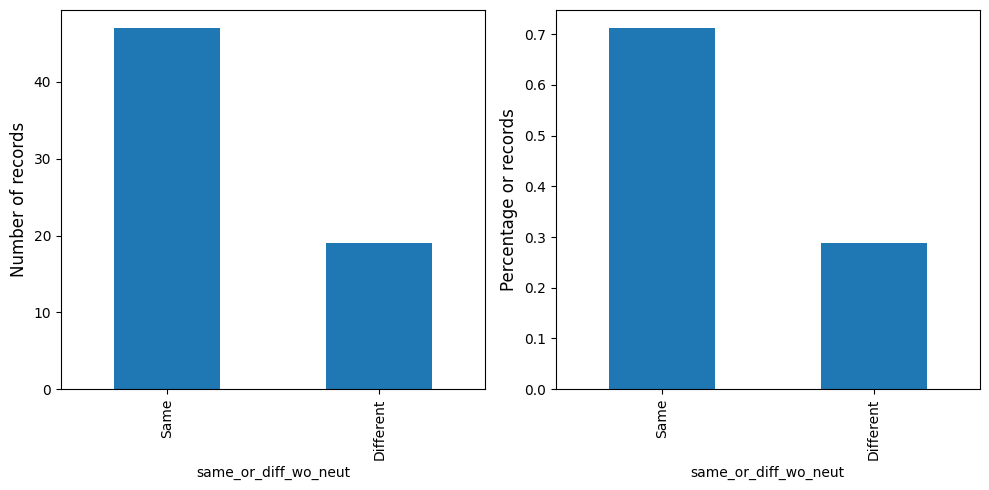

In [ ]:
print("Same or Different after removing the Neutral records : Comparision")
counts = dfwn['same_or_diff_wo_neut'].value_counts()
percent = counts/sum(counts)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

counts.plot(kind='bar', ax=ax1)
percent.plot(kind='bar', ax=ax2)
ax1.set_ylabel('Number of records', size=12)
ax2.set_ylabel('Percentage or records', size=12)
plt.tight_layout()
plt.show()

In [ ]:
df['color'] = df['same_or_diff_w_neut'].apply(lambda x : "green" if x == 'Same' else 'red')

fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4],
    columnwidth = [400, 100, 100, 120],
    header=dict(values=['text', 'tf-sentiment', 'vader-sentiment', 'same_or_different'],
                fill_color='paleturquoise',
                line_color='black',
                align='center',
                height=40),
    cells=dict(values=[df['text'],df['tf-sentiment'], df['vader-sentiment'], df['same_or_diff_w_neut']],
               fill_color=[['lavender'], ['lavender'], ['lavender'], list(df.color)],
               line_color='black',
               align='left'))
])

fig.update_layout(height=700,
                 title="Comparision across Transformer and VADER")

fig.show()